In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import bokeh.models as bm
import bokeh.plotting as pl
from bokeh.io import output_notebook
from bokeh.palettes import Category10_10
# Read the CSV file with counts
df = pd.read_csv('unique_words_UK.csv')


# Ukrainian

## Tone

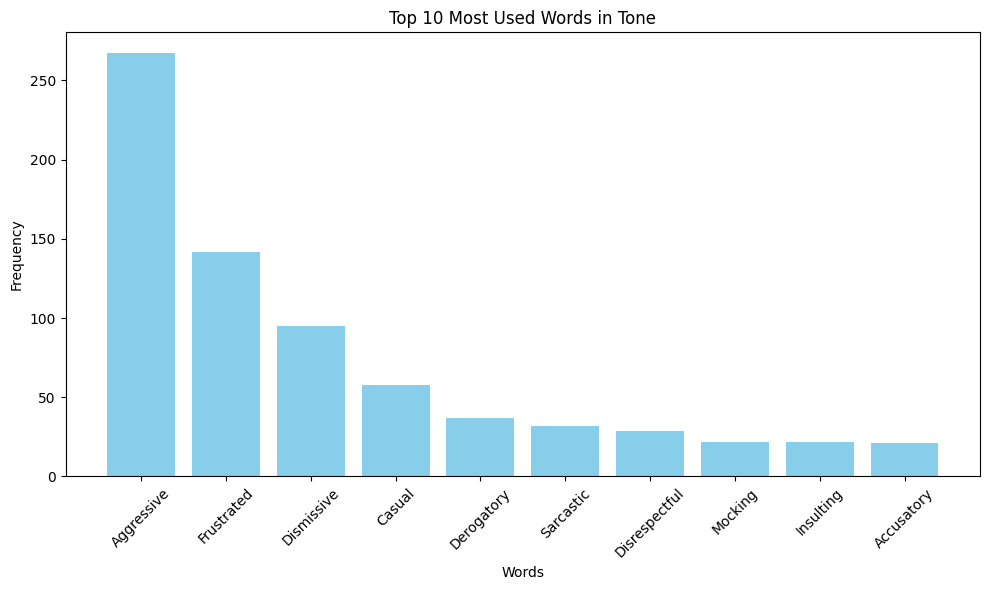

            Tone  Tone appears
0     Aggressive         267.0
1     Frustrated         142.0
2     Dismissive          95.0
3         Casual          58.0
4     Derogatory          37.0
5      Sarcastic          32.0
6  Disrespectful          29.0
7        Mocking          22.0
8      Insulting          22.0
9     Accusatory          21.0


In [2]:
# Plot histogram for the 'Tone' column
tone_df = df[['Tone', 'Tone appears']].sort_values(by='Tone appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(tone_df['Tone'], tone_df['Tone appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Tone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(tone_df)

## Language

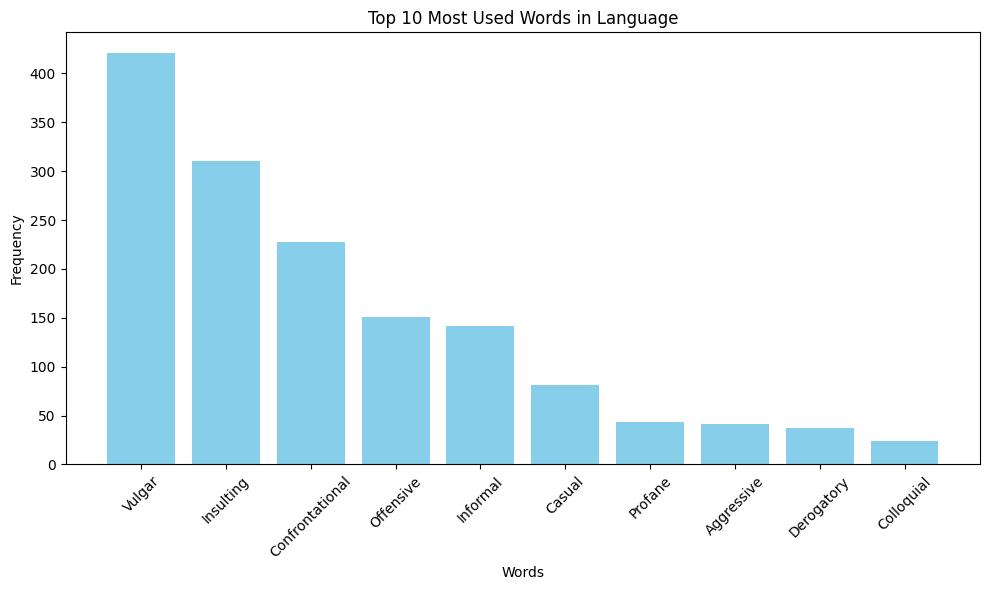

          Language  Language appears
0           Vulgar             421.0
1        Insulting             310.0
2  Confrontational             228.0
3        Offensive             151.0
4         Informal             142.0
5           Casual              81.0
6          Profane              43.0
7       Aggressive              41.0
8       Derogatory              37.0
9       Colloquial              24.0


In [3]:
# Plot histogram for the 'Language' column
language_df = df[['Language', 'Language appears']].sort_values(by='Language appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(language_df['Language'], language_df['Language appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Language')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(language_df)

## Sentiment

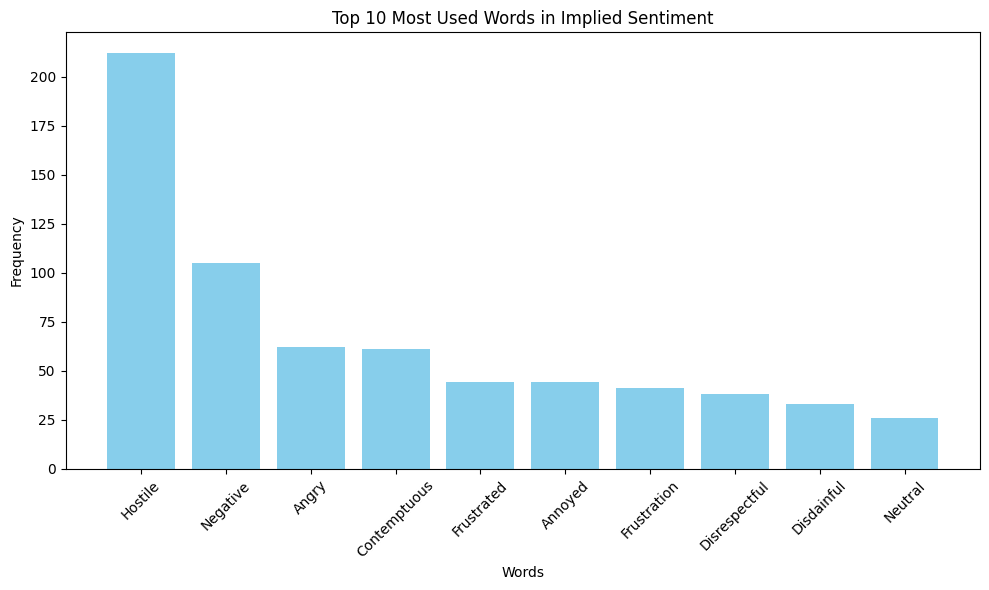

  Implied Sentiment  Implied Sentiment appears
0           Hostile                      212.0
1          Negative                      105.0
2             Angry                       62.0
3      Contemptuous                       61.0
4        Frustrated                       44.0
5           Annoyed                       44.0
6       Frustration                       41.0
7     Disrespectful                       38.0
8        Disdainful                       33.0
9           Neutral                       26.0


In [4]:
# Plot histogram for the 'Implied Sentiment' column
implied_sentiment_df = df[['Implied Sentiment', 'Implied Sentiment appears']].sort_values(by='Implied Sentiment appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(implied_sentiment_df['Implied Sentiment'], implied_sentiment_df['Implied Sentiment appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Implied Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(implied_sentiment_df)

## All together

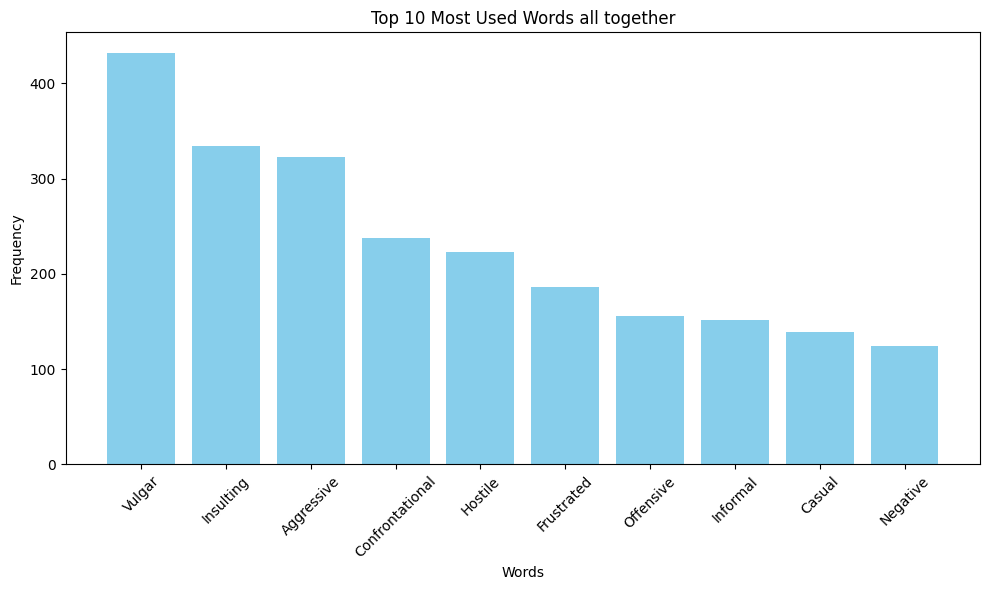

           combine  combine appears
0           Vulgar            432.0
1        Insulting            334.0
2       Aggressive            323.0
3  Confrontational            238.0
4          Hostile            223.0
5       Frustrated            186.0
6        Offensive            156.0
7         Informal            152.0
8           Casual            139.0
9         Negative            124.0


In [5]:
# Plot histogram for the 'Combine' column
implied_sentiment_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(implied_sentiment_df['combine'], implied_sentiment_df['combine appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words all together')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(implied_sentiment_df)

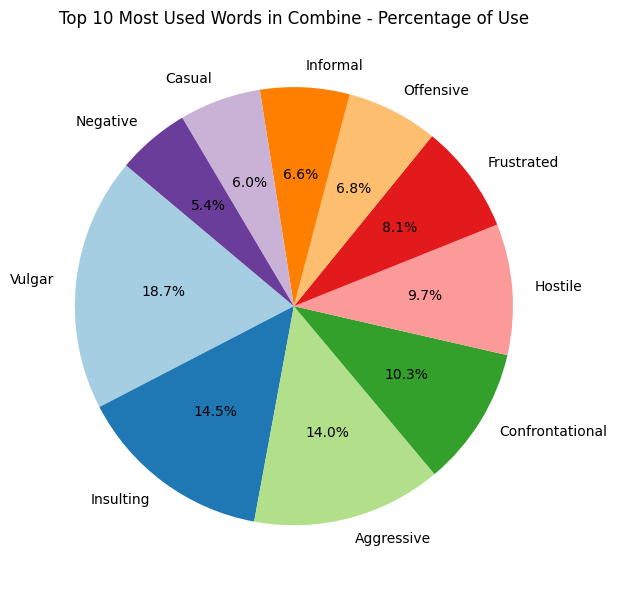

In [6]:
total_sentences = 1000

# Get the top 10 most used words from the 'combine' column
combine_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)

# Calculate the percentage of use for each word
combine_df['percentage'] = (combine_df['combine appears'] / total_sentences) * 100

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(combine_df['percentage'], labels=combine_df['combine'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Most Used Words in Combine - Percentage of Use')
plt.tight_layout()
plt.show()

## Toxic Words

In [7]:
df_t = pd.read_csv('UK-toxicWordsList.csv')
df_toxic = df_t[['uniq sequences', 'number appears']].sort_values(by='number appears', ascending=False).head(10).reset_index(drop=True)
df_toxic['uniq sequences'] = df_toxic['uniq sequences'].astype(str)

print(df_toxic)

  uniq sequences  number appears
0          блять             129
1          нахуй              58
2           сука              48
3          хуйня              42
4            бля              42
5            хуй              37
6          блядь              34
7          похуй              34
8          хуйню              33
9          бляха              13


## Toxic Words After Translation

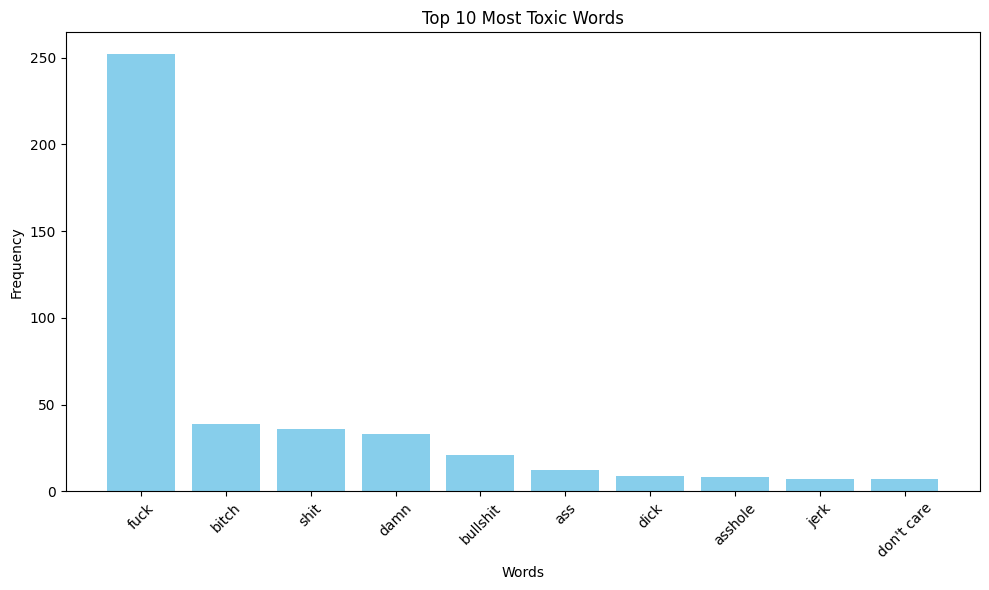

  uniq sequences  number appears
0           fuck             252
1          bitch              39
2           shit              36
3           damn              33
4       bullshit              21
5            ass              12
6           dick               9
7        asshole               8
8           jerk               7
9     don't care               7


In [8]:
df_t = pd.read_csv('600-test/UK-toxic.csv')
df_toxic = df_t[['uniq sequences', 'number appears']].sort_values(by='number appears', ascending=False).head(10).reset_index(drop=True)
df_toxic['uniq sequences'] = df_toxic['uniq sequences'].astype(str)

plt.figure(figsize=(10, 6))
plt.bar(df_toxic['uniq sequences'], df_toxic['number appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Toxic Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(df_toxic)

## Clustering With Tone Presentation

In [9]:

# Read the CSV file into a Pandas DataFrame
file_path = 'UK-analyze-cluster.csv'
df = pd.read_csv(file_path)

# Extract the Keyword Vector column
keyword_vectors = np.array(df['Keyword Vector'].apply(eval).tolist())

# Compute PCA to reduce the dimensionality of the Keyword Vector
keyword_vectors_pca = PCA(n_components=2).fit_transform(keyword_vectors)

# Normalize vectors to have zero mean and unit variance
keyword_vectors_pca = StandardScaler().fit_transform(keyword_vectors_pca)

# Initialize Bokeh for notebook output
output_notebook()

# Function to draw interactive plot for data points with auxiliary info on hover
def draw_vectors(x, y, phrases, cluster_labels, radius=10, alpha=0.6, width=600, height=400, max_sentence_length=70, show=True, **kwargs):
    # Truncate sentences that are too long
    truncated_phrases = [phrase[:max_sentence_length] + '...' if len(phrase) > max_sentence_length else phrase for phrase in phrases]
    colors = [Category10_10[i] for i in cluster_labels]
    data_source = bm.ColumnDataSource({"x": x, "y": y, "phrases": truncated_phrases, "color": colors, **kwargs})
    fig = pl.figure(active_scroll="wheel_zoom", width=width, height=height)
    scatter = fig.scatter("x", "y", size=radius, color="color", alpha=alpha, source=data_source)
    hover_tool = bm.HoverTool(tooltips=[("Phrase", "@phrases")] + [(key, "@" + key) for key in kwargs.keys()], mode="mouse")
    fig.add_tools(hover_tool)
    if show:
        pl.show(fig)
    return fig

# Plotting the phrases in 2D space
draw_vectors(keyword_vectors_pca[:, 0], keyword_vectors_pca[:, 1], df['Tone'].tolist(), df['K_means_cluster'].tolist())


Loading BokehJS ...

figure(id='p1004', ...)

## Clustering With Language Presentation

In [10]:
draw_vectors(keyword_vectors_pca[:, 0], keyword_vectors_pca[:, 1], df['Language'].tolist(), df['K_means_cluster'].tolist())

figure(id='p1053', ...)

## Clustering With Sentiment Presentation

In [11]:
draw_vectors(keyword_vectors_pca[:, 0], keyword_vectors_pca[:, 1], df['Implied Sentiment'].tolist(), df['K_means_cluster'].tolist())

figure(id='p1102', ...)